In [28]:
from itertools import groupby
import json

import networkx as nx
import shelve
import numpy as np
import pandas as pd
from collections import Counter
from random import choice, sample
from tqdm import tqdm

In [9]:
with shelve.open('../<class \'pylibfuzzer.obs_extraction.cfg_reward.CfgRewardExtractor\'>.cache') as s:
    graph = s['graph']
    mapping = s['inv_mapping']
G = nx.DiGraph()
G.add_edges_from([(u, v) for u, vs in graph.items() for v in vs])

1290
21
61.42857142857143
Counter({4: 6, 12: 2, 7: 2, 710: 1, 137: 1, 14: 1, 18: 1, 80: 1, 123: 1, 11: 1, 5: 1, 9: 1, 90: 1, 31: 1})


<AxesSubplot:>

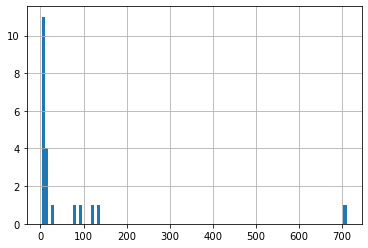

In [12]:
comps = np.array([len(comp) for comp in nx.weakly_connected_components(G)])

print(len(G))
print(len(comps))
print(comps.mean())
print(Counter(comps))
pd.Series(comps).hist(log=False,bins=100)

In [38]:
node_to_id = {k:[v_[0] for v_ in v] for k,v in groupby(mapping.items(), key=lambda x:x[1])}
#node_to_id

In [37]:
with open('../cov.json') as f:
    cov_nodes =  set([mapping.get(n,None) for n in json.load(f)])
len(cov_nodes)

234

In [42]:
for comp in nx.weakly_connected_components(G):
    if len(comp) >200:
        print(node_to_id)
        print(cov_nodes-G.nodes)
        print(cov_nodes-comp)
        print([node_to_id.get(node,0) for node in comp])


print(nx.info(G))

{0: [20, 21], 1: [24, 25, 22, 23], 2: [26, 27], 4: [28], 5: [29], 6: [30], 7: [31], 8: [32], 10: [33], 105: [53], 685: [166], 686: [168, 167], 687: [169], 689: [170], 691: [171], 692: [172, 173], 694: [174], 695: [175], 696: [176], 697: [177], 699: [178], 701: [179], 702: [180], 704: [181], 705: [182, 183], 706: [184, 185], 707: [186], 708: [187, 188], 709: [189], 710: [190], 712: [191], 714: [192], 715: [193], 716: [194], 717: [195], 718: [196], 720: [197], 721: [198, 199], 722: [200, 201], 723: [202, 203], 724: [204, 205], 727: [206], 728: [208, 207], 730: [209], 731: [210], 732: [211], 733: [212], 735: [213], 736: [214], 737: [215], 740: [216], 741: [217, 218], 743: [219], 744: [220, 221], 746: [222], 747: [224, 225, 223], 748: [226], 750: [227], 752: [228], 753: [229], 755: [230], 757: [231], 759: [232], 760: [233], 762: [234], 764: [235], 766: [236], 767: [237], 768: [238, 239], 770: [240], 771: [241], 772: [242], 773: [243], 774: [244], 775: [245, 246], 777: [247], 778: [248], 77

In [5]:
G2 = G.copy()

with tqdm(total=nx.number_weakly_connected_components(G2)) as pbar:
    while not nx.is_weakly_connected(G2):
        comps = nx.weakly_connected_components(G2)
        comps_ = next(comps), next(comps)
        G2.add_edge(*sample([choice(list(comp)) for comp in comps_],k=2))
        pbar.update()
    
print(nx.info(G2))

 95%|█████████▌| 20/21 [00:00<00:00, 298.47it/s]

Name: 
Type: DiGraph
Number of nodes: 1290
Number of edges: 3266
Average in degree:   2.5318
Average out degree:   2.5318


<AxesSubplot:>

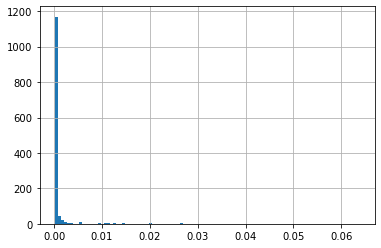

In [6]:
pd.Series(nx.pagerank(G2)).hist(bins=100)

In [7]:
{k:set(dict(v).keys()) for k,v in G2.adj.items()}

{3: {4, 5},
 4: {6},
 5: {6},
 6: set(),
 8: {10, 105, 286, 347, 394, 588, 685, 686, 687},
 105: {689, 691, 692},
 10: {689, 691, 692, 967},
 394: {394, 588, 685, 686, 687},
 588: {588, 685, 686},
 685: {687},
 686: {689, 691, 692},
 687: {10, 105, 286, 347, 394, 588, 685, 686, 687},
 347: {347, 686, 687},
 286: {286, 686, 687},
 9: {10, 105, 286, 347, 394, 588, 685, 686, 687},
 689: {694, 695},
 691: {694, 695},
 692: {694, 695},
 11: {105, 286, 347, 394, 588, 685, 686, 687},
 12: {105, 286, 347, 394, 588, 685, 686, 687},
 13: {105, 286, 347, 394, 588, 685, 686, 687},
 14: {105, 286, 347, 394, 588, 685, 686, 687},
 15: {105, 286, 347, 394, 588, 685, 686, 687},
 16: {105, 286, 347, 394, 588, 685, 686, 687},
 17: {105, 286, 347, 394, 588, 685, 686, 687},
 18: {105, 286, 347, 394, 588, 685, 686, 687},
 19: {105, 286, 347, 394, 588, 685, 686, 687},
 20: {686, 687},
 21: {686, 687},
 22: {686, 687},
 23: {687},
 24: {686, 687},
 25: {686, 687},
 26: {686, 687},
 27: {686, 687},
 28: {686, 